# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids

In [3]:
pycentroids._pycentroids.omp_info()

{'dynamic': 0, 'num_procs': 64, 'threads_limit': 2147483647, 'threads_max': 64}

In [4]:
help(pycentroids.find_photons)

Help on function find_photons in module pycentroids.pycentroids:

find_photons(images, threshold=200, box=2, search_box=1, pixel_photon=10, pixel_bgnd=15, overlap_max=0, sum_min=800, sum_max=1250, fit_pixels_2d=True, fit_pixels_1d_x=True, fit_pixels_1d_y=True, return_pixels='none', return_map=False)
    Find photons in CCD images and process for sub-pixel center.
    
    Parameters
    ----------
    images : numpy.ndarray
        Images to process of 3 dimensions
    threshold : int
        Pixel value threshold for first search of images
    box : int
        Value for pixel box, Box size is
        (2 * box + 1) * (2 * box + 1)
    search_box : int
        Value for pixel seaarch box, Box size is
        (2 * box + 1) * (2 * box + 1)
        This value defines the box which is used to ensure that the
        center pixel is the highest. This should be set to the size of
        the charge cloud from the photon event.
    pixel_photon : int
        Number of pixels to include for ph

## Load test data

In [5]:
!test -f images.h5 || curl -o images.h5 https://centroids-data.s3.amazonaws.com/images.h5

In [6]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [7]:
data.shape

(40, 1612, 3304)

In [8]:
#large_data = data.copy()
#for i in range(50):
#    large_data = np.concatenate((large_data, data))

## Call the fast code for single photon counting

In [9]:
#timeit.timeit("centroids.find_photons(large_data, 400, 2, store_pixels='none')", globals=globals(), number=1)
#pycentroids.find_photons(data, 400, 2, return_pixels='sorted')

In [10]:
df, out, pixels = pycentroids.find_photons(data, 250, 3, sum_max=1200, sum_min=800,
                                           pixel_photon=9, pixel_bgnd=20,
                                           fit_pixels_2d=True, fit_pixels_1d_x=True, fit_pixels_1d_y=True,
                                           return_pixels='unsorted', return_map=True)

In [11]:
df.shape

(702, 44)

In [12]:
if out is not None:
    print(repr(out.shape))

(40, 1612, 3304)


In [13]:
if pixels is not None:
    print(pixels.shape)
    print()
    print(repr(pixels[0]))

(702, 7, 7)

array([[156, 156, 160, 174, 162, 160, 157],
       [162, 157, 158, 155, 169, 162, 162],
       [160, 157, 154, 228, 185, 164, 157],
       [155, 156, 187, 575, 417, 168, 149],
       [161, 155, 164, 243, 193, 182, 162],
       [168, 159, 151, 158, 157, 154, 153],
       [178, 158, 154, 159, 157, 169, 157]], dtype=uint16)


In [14]:
df.columns

Index(['Pixel X', 'Pixel Y', 'COM X', 'COM Y', 'COR COM X', 'COR COM Y', 'Int',
       'Bgnd', 'Overlap', 'Fit X', 'Fit Y', 'Fit Bgnd', 'Fit Amp', 'Fit Sigma',
       'Fit Err X', 'Fit Err Y', 'Fit Err Bgnd', 'Fit Err Amp',
       'Fit Err Sigma', 'Fit Fnorm', 'Fit Outcome', 'Fit StdErr', 'Fit 1DX X',
       'Fit 1DX Bgnd', 'Fit 1DX Amp', 'Fit 1DX Sigma', 'Fit 1DX Err X',
       'Fit 1DX Err Bgnd', 'Fit 1DX Err Amp', 'Fit 1DX Err Sigma',
       'Fit 1DX Fnorm', 'Fit 1DX Outcome', 'Fit 1DX StdErr', 'Fit 1DY Y',
       'Fit 1DY Bgnd', 'Fit 1DY Amp', 'Fit 1DY Sigma', 'Fit 1DY Err Y',
       'Fit 1DY Err Bgnd', 'Fit 1DY Err Amp', 'Fit 1DY Err Sigma',
       'Fit 1DY Fnorm', 'Fit 1DY Outcome', 'Fit 1DY StdErr'],
      dtype='object')

In [15]:
df = df[df['Fit Outcome'] < 4]
df = df[df['Fit 1DX Outcome'] < 4]
df = df[df['Fit 1DY Outcome'] < 4]
df.shape

(694, 44)

In [16]:
df

,Pixel X,Pixel Y,COM X,COM Y,COR COM X,COR COM Y,Int,Bgnd,Overlap,Fit X,...,Fit 1DY Bgnd,Fit 1DY Amp,Fit 1DY Sigma,Fit 1DY Err Y,Fit 1DY Err Bgnd,Fit 1DY Err Amp,Fit 1DY Err Sigma,Fit 1DY Fnorm,Fit 1DY Outcome,Fit 1DY StdErr
0,588.0,871.0,588.282516,871.024083,588.282333,871.023833,978.413793,156.620690,0.0,588.354853,...,1120.450122,455.424574,0.426333,0.046660,13.979061,32.234271,0.037649,27.823681,1.0,14.216238
1,390.0,872.0,390.401867,871.932547,390.401500,871.932167,942.413793,157.620690,0.0,390.418458,...,1128.956109,436.653619,0.399455,0.132371,36.378127,83.637899,0.106064,72.569027,1.0,22.656333
2,426.0,872.0,426.433709,872.437770,426.432667,872.436333,1113.758621,156.137931,0.0,426.274304,...,1110.690788,553.582241,0.406586,0.150147,45.783231,109.594956,0.299884,88.370072,1.0,25.125357
3,433.0,872.0,433.044529,872.362589,433.044000,872.361167,1073.379310,158.068966,0.0,432.833759,...,1122.777367,571.779220,0.552940,0.126649,58.637060,150.692830,0.248180,105.318348,1.0,37.216835
4,482.0,872.0,482.483224,872.600964,482.482167,872.599500,1104.965517,156.448276,0.0,482.230855,...,1112.386591,551.146932,0.488290,0.093364,59.974932,158.758492,0.394663,103.809993,1.0,32.560063
5,644.0,872.0,643.976935,871.906736,643.976167,871.906500,873.827586,155.241379,0.0,643.895103,...,1101.039280,448.362521,0.490593,0.114473,35.059813,81.956488,0.096305,69.037123,1.0,15.324741
6,741.0,872.0,741.816738,871.926075,741.815833,871.924833,1011.241379,157.862069,0.0,741.503949,...,1118.797021,513.210425,0.505241,0.111561,39.125990,91.887432,0.095237,76.753885,1.0,8.316895
7,769.0,872.0,768.967804,871.796658,768.967000,871.796500,1070.724138,155.586207,0.0,768.873770,...,1103.766451,538.817422,0.428283,0.094440,31.569605,73.287214,0.098166,62.508621,1.0,12.433276
8,777.0,872.0,777.329448,871.617340,777.328167,871.616833,1147.103448,155.655172,0.0,777.192122,...,1126.400000,510.100000,0.128341,0.000000,0.000000,0.000000,0.000000,114.971364,1.0,37.332738
9,834.0,872.0,834.069726,871.879486,834.069667,871.879000,1057.310345,156.965517,0.0,834.041434,...,1106.808403,552.670589,0.420463,0.079082,27.639029,63.813262,0.070921,54.958881,1.0,6.603524


## Plot the results 
### Whole image

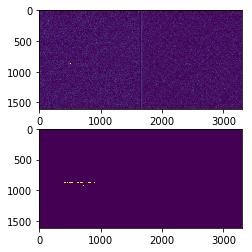

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

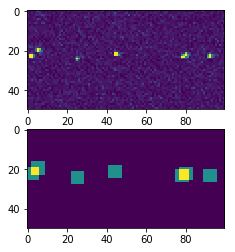

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

Text(0.5, 0, 'ADUs')

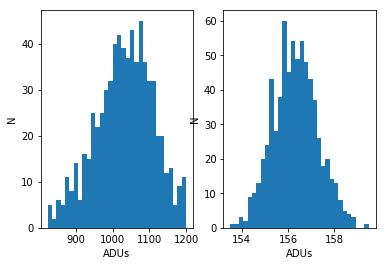

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df['Int'], bins=32)
ax[0].set_ylabel('N')
ax[0].set_xlabel('ADUs')
ax[1].hist(df['Bgnd'], bins=32)
ax[1].set_ylabel('N')
ax[1].set_xlabel('ADUs')

In [20]:
xfrac = df['COM X'] - df['Pixel X']
yfrac = df['COM Y'] - df['Pixel Y']
xfrac_fit = df['Fit X'] - df['Pixel X']
yfrac_fit = df['Fit Y'] - df['Pixel Y']
xfrac_fit_1d = df['Fit 1DX X'] - df['Pixel X']
yfrac_fit_1d = df['Fit 1DY Y'] - df['Pixel Y']

Text(0.5, 0, 'Pixel Fractional Coord')

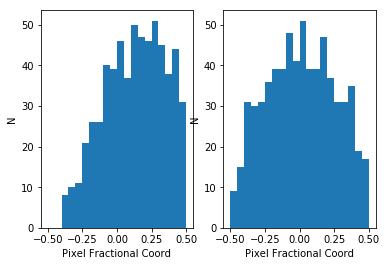

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac, bins=20, range=(-0.5, 0.5))
ax[1].hist(yfrac, bins=20, range=(-0.5, 0.5))
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

Text(0.5, 0, 'Pixel Fractional Coord')

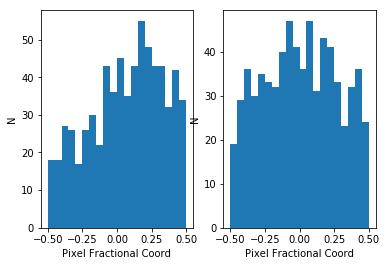

In [22]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac_fit, bins=20, range=(-0.5, 0.5))
ax[1].hist(yfrac_fit, bins=20, range=(-0.5, 0.5))
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

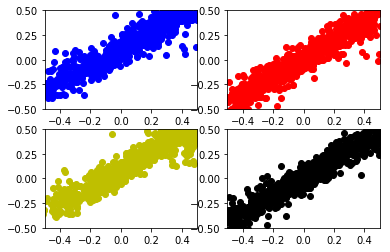

In [23]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(xfrac_fit, xfrac, 'bo')
ax[0,1].plot(yfrac_fit, yfrac, 'ro')
ax[1,0].plot(xfrac_fit_1d, xfrac, 'yo')
ax[1,1].plot(yfrac_fit_1d, yfrac, 'ko')
for _ax in ax:
    for a in _ax:
        a.set_xlim([-0.5, 0.5])
        a.set_ylim([-0.5, 0.5])

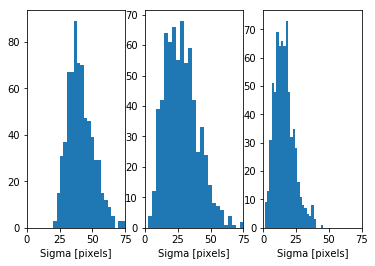

In [24]:
fig, ax = plt.subplots(1,3)
ax[0].hist(df['Fit StdErr'], bins=25)
ax[0].set_xlabel('Sigma [pixels]')
ax[1].hist(df['Fit 1DX StdErr'], bins=25)
ax[1].set_xlabel('Sigma [pixels]')
ax[2].hist(df['Fit 1DY StdErr'], bins=25)
ax[2].set_xlabel('Sigma [pixels]')
for a in ax:
    a.set_xlim(0, 75)

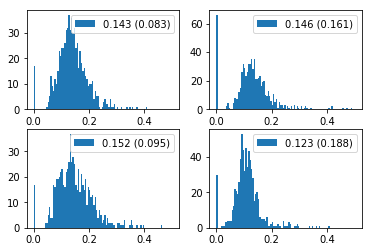

In [25]:
def plot_hist(ax, x):
    ax.hist(x, bins=100, range=(0,0.5),
            label='{:.3f} ({:.3f})'.format(np.mean(x), np.std(x)))
    ax.legend()
    
fig, ax = plt.subplots(2,2)
plot_hist(ax[0,0], df['Fit Err X'])
plot_hist(ax[1,0], df['Fit Err Y'])
plot_hist(ax[0,1], df['Fit 1DX Err X'])
plot_hist(ax[1,1], df['Fit 1DY Err Y'])

Text(0.5, 0, 'Fitted Background Value [ADU]')

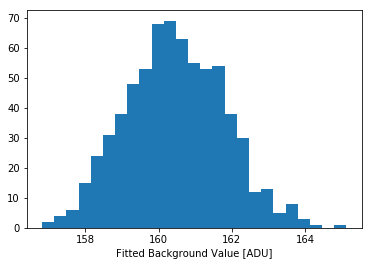

In [26]:
fig, ax = plt.subplots(1,1)
ax.hist(df['Fit Bgnd'], bins=25)
ax.set_xlabel('Fitted Background Value [ADU]')

In [27]:
pycentroids._pycentroids.__version__

'v0.1.7-12-gb0e0fcd+'